### idea 
user input his(personality test answers)and the system recommeds his matching Cats 


### metodology 
since our users don't have any prior preferences towards Cats(USER COLD START problem) we have to start with this:

#### version 1 
1. Finding **nearset user**: the system takes user input (personality test answers) then finds the nearsest user (the most similar one) from our DataSet
    - for better pridections : we filterd out users with staisfacton level blow 0.8 

2. we get the nearest user - **Connceted Cat** (from the DataSet)

####  version 2 
same as vesrion 1 but builds on it 

- based on the **Connceted Cat** the system recommends the nearset cat from an external data set "Cat_dataset_online"
- Adv:cats and adopters datasets are indepentant 


some notes: 

- there isn't any active learning,the system just recommends based on the Dataset (aka. the scale where every user get his recommended cat)  
- due to the DataSet setup, each user is exposed to one and only one Cat (Aka. each user rates one Cat). so we are forced to use "**user_based** collaborative filtering", in Addition satisfaction here is based on live -interaction between the Adopter and the cat for some time, so the satisfaction is a reliable scale 




###  for relasing this we need 
- function for inserting the questionare results then append them to the Dataset (oksana on it)
- **important** write a reveiw on the results and specify why we used coverage as main evaluation 
- **important** explain what is version2 in more details and do coverage test 
- **good to try** for example jaccard distance as an alternative methoud 


##### done 
-  encapsulationg the version 2 into a proper function 
-  Cats random names feature 
- **impotant** try another algorism  (cosine simlarity done .... may evalute it according to coverage (done)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression


pd.set_option('display.max_columns', 1000)

In [3]:
df = pd.read_excel('https://github.com/TechLabs-Berlin/wt21-pet-match/blob/main/ds_documentation/data_set/data_cleaned/all_cleaned_num.xlsx?raw=true')

#df.describe()

In [4]:
df = df.set_index('id').drop(columns = 'breed')

In [5]:
df.head()

cat_age  cat_gender  needs_outdoor  medical_conditions  \
id                                                           
0         6           1              2                   2   
1         2           2              2                   1   
2         5           1              1                   1   
3         4           2              2                   1   
4         3           2              2                   1   

    behavioural_problems  cat_weight  likes_to_explore  playful  vocal  \
id                                                                       
0                      1           3                 4        4      3   
1                      1           3                 4        4      1   
2                      1           4                 5        3      4   
3                      1           4                 3        4      3   
4                      1           5                 4        3      5   

    picked_up  timid  aggressive  adapts_quickly  prefers_alone  likes_stroke  \
id                                                                              
0           2      3           1               3              2             4   
1           4      3           3               2              3             4   
2           2      2           3               4              3             3   
3           5      4           2               2              2             5   
4           2      3           1               4              3             4   

    tolerant_handled  friendly  fearful  adopter_gender  adopter_age  \
id                                                                     
0                  3         4        5               2            2   
1                  3         5        2               2            2   
2                  2         3        3               2            1   
3                  4         4        4               2            1   
4                  3         4        3               2            2   

    other_cats  outdoor_access  worries  easily_nervous  remains_calm  \
id                                                                      
0            2               2        5               4             4   
1            0               2        5               5             5   
2            0               1        5               0             0   
3            1               2        5               5             2   
4            3               2        4               4             4   

    talkative  outgoing  reserved  new_ideas  values_artistic  \
id                                                              
0           4         4         4          2                5   
1           4         3         5          4                3   
2           4         0         2          3                0   
3           4         3         4          4                5   
4           2         3         4          3                3   

    active_imagination  rude  forgiving  considerate  thorough job  lazy  \
id                                                                         
0                    3     1          4            5             4     4   
1                    4     3          5            5             5     1   
2                    4     0          4            0             5     0   
3                    5     4          5            4             3     4   
4                    3     3          4            4             4     4   

    efficient  satisf_level  
id                           
0           4          1.00  
1           5          1.00  
2           0          0.85  
3           3          1.00  
4           4          1.00

## Random Cat-Names feature

- to for the easy identifaction of Cats 

In [6]:
# pip install names
import names

In [7]:
def Random_names(i):
    
    while i < len(df):
        if df["cat_gender"][df.index[i]] == 1:
            return str(names.get_first_name(gender='male'))
        else:
            return str(names.get_first_name(gender='female'))
        

In [8]:
temp_names = []
for n in df.index:
    random_name=Random_names(n)
    temp_names.append(random_name)
    
#print(temp_names)

df["cat_name"] = temp_names 


In [9]:
df

cat_age  cat_gender  needs_outdoor  medical_conditions  \
id                                                             
0           6           1              2                   2   
1           2           2              2                   1   
2           5           1              1                   1   
3           4           2              2                   1   
4           3           2              2                   1   
...       ...         ...            ...                 ...   
3326       12           2              1                   1   
3327        7           1              2                   1   
3328        4           1              1                   1   
3329        1           1              1                   1   
3330        3           1              1                   1   

      behavioural_problems  cat_weight  likes_to_explore  playful  vocal  \
id                                                                         
0                        1           3                 4        4      3   
1                        1           3                 4        4      1   
2                        1           4                 5        3      4   
3                        1           4                 3        4      3   
4                        1           5                 4        3      5   
...                    ...         ...               ...      ...    ...   
3326                     1           3                 5        5      3   
3327                     1           3                 5        4      3   
3328                     1           3                 5        5      5   
3329                     1           3                 4        5      3   
3330                     1           3                 4        4      4   

      picked_up  timid  aggressive  adapts_quickly  prefers_alone  \
id                                                                  
0             2      3           1               3              2   
1             4      3           3               2              3   
2             2      2           3               4              3   
3             5      4           2               2              2   
4             2      3           1               4              3   
...         ...    ...         ...             ...            ...   
3326          4      4           1               4              2   
3327          4      3           1               4              1   
3328          5      1           1               5              2   
3329          5      4           3               5              1   
3330          5      2           1               4              1   

      likes_stroke  tolerant_handled  friendly  fearful  adopter_gender  \
id                                                                        
0                4                 3         4        5               2   
1                4                 3         5        2               2   
2                3                 2         3        3               2   
3                5                 4         4        4               2   
4                4                 3         4        3               2   
...            ...               ...       ...      ...             ...   
3326             5                 4         5        2               2   
3327             5                 5         4        2               2   
3328             5                 5         5        1               2   
3329             5                 5         5        4               2   
3330             5                 5         5        1               2   

      adopter_age  other_cats  outdoor_access  worries  easily_nervous  \
id                                                                       
0               2           2               2        5               4   
1               2           0               2        5               5   
2             

## filtering out the unstisfied users 

- nearly 58% are fully staisfied (satisfaction = 1), while (~10%) are blew 0.8 satisfaction.
- since the recommender needs the users and Adopters to be high satisfied we choose to remove subjects with satisfaction less than 0.8 

<AxesSubplot:title={'center':'Satisfaction Distribution'}>

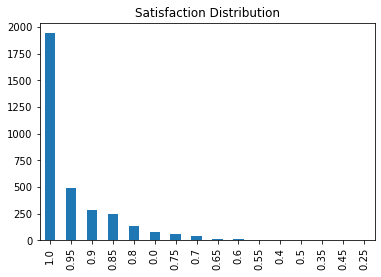

In [10]:
df['satisf_level'].value_counts().plot(kind='bar',title='Satisfaction Distribution' ,label= '.')


In [11]:
df['satisf_level'].value_counts(normalize = True)

1.00    0.582408
0.95    0.147403
0.90    0.085860
0.85    0.075053
0.80    0.039928
0.00    0.024917
0.75    0.018613
0.70    0.011408
0.65    0.003903
0.60    0.003603
0.55    0.002402
0.40    0.001501
0.50    0.001501
0.35    0.000600
0.45    0.000600
0.25    0.000300
Name: satisf_level, dtype: float64

In [12]:
df_happy = df.loc[df["satisf_level"] > 0.8].drop(columns=["satisf_level"]).reset_index(drop=True)
df_happy.shape

(2967, 38)

## Finding nearest user (utility matrix table)

In [13]:
# setting up a subset for the users_only features 
df_adopters = df_happy.loc[:, "adopter_gender":"efficient"]
df_adopters

adopter_gender  adopter_age  other_cats  outdoor_access  worries  \
0                  2            2           2               2        5   
1                  2            2           0               2        5   
2                  2            1           0               1        5   
3                  2            1           1               2        5   
4                  2            2           3               2        4   
...              ...          ...         ...             ...      ...   
2962               2            5           2               1        2   
2963               2            4           0               2        2   
2964               2            1           3               1        5   
2965               2            3           1               1        4   
2966               2            2           1               1        4   

      easily_nervous  remains_calm  talkative  outgoing  reserved  new_ideas  \
0                  4             4          4         4         4          2   
1                  5             5          4         3         5          4   
2                  0             0          4         0         2          3   
3                  5             2          4         3         4          4   
4                  4             4          2         3         4          3   
...              ...           ...        ...       ...       ...        ...   
2962               1             4          4         4         2          3   
2963               1             4          3         4         4          5   
2964               5             3          3         2         4          5   
2965               4             4          1         5         2          3   
2966               2             3          1         1         5          3   

      values_artistic  active_imagination  rude  forgiving  considerate  \
0                   5                   3     1          4            5   
1                   3                   4     3          5            5   
2                   0                   4     0          4            0   
3                   5                   5     4          5            4   
4                   3                   3     3          4            4   
...               ...                 ...   ...        ...          ...   
2962                4                   3     1          5            5   
2963                5                   5     2          5            5   
2964                5                   5     4          5            5   
2965                5                   4     4          1            5   
2966                3                   3     3          4            3   

      thorough job  lazy  efficient  
0                4     4          4  
1                5     1          5  
2                5     0          0  
3                3     4          3  
4                4     4          4  
...            ...   ...        ...  
2962             4     1          4  
2963             4     4          5  
2964             3     5          4  
2965             5     2          5  
2966             4     4          4  

[2967 rows x 19 columns]

In [14]:
# create utility matrix table to study the user and book relation
df_pivot=df_adopters.transpose()
df_pivot

0     1     2     3     4     5     6     7     8     \
adopter_gender         2     2     2     2     2     2     2     2     2   
adopter_age            2     2     1     1     2     4     2     3     2   
other_cats             2     0     0     1     3     2     1     0     0   
outdoor_access         2     2     1     2     2     2     2     1     1   
worries                5     5     5     5     4     4     3     3     4   
easily_nervous         4     5     0     5     4     2     2     3     3   
remains_calm           4     5     0     2     4     3     4     3     4   
talkative              4     4     4     4     2     3     4     3     4   
outgoing               4     3     0     3     3     2     3     2     4   
reserved               4     5     2     4     4     3     4     3     3   
new_ideas              2     4     3     4     3     4     5     4     5   
values_artistic        5     3     0     5     3     5     4     2     4   
active_imagination     3     4     4     5     3     4     5     2     4   
rude                   1     3     0     4     3     2     2     2     2   
forgiving              4     5     4     5     4     2     4     3     5   
considerate            5     5     0     4     4     3     4     4     5   
thorough job           4     5     5     3     4     4     5     5     4   
lazy                   4     1     0     4     4     4     4     2     3   
efficient              4     5     0     3     4     4     3     5     5   

                    9     10    11    12    13    14    15    16    17    \
adopter_gender         2     2     2     2     2     2     2     2     2   
adopter_age            1     5     1     2     5     3     5     1     3   
other_cats             7     0     1     1     2     1     0     1     8   
outdoor_access         1     2     1     2     2     2     2     2     1   
worries                2     5     4     5     4     4     5     5     5   
easily_nervous         3     4     4     4     4     4     5     4     4   
remains_calm           4     2     2     2     2     2     3     4     4   
talkative              3     3     5     5     2     2     3     2     3   
outgoing               2     2     3     5     2     3     1     2     2   
reserved               3     5     3     1     5     4     5     4     4   
new_ideas              4     5     2     4     3     4     5     3     5   
values_artistic        4     5     3     3     5     5     5     4     5   
active_imagination     4     5     2     5     4     5     5     5     5   
rude                   2     4     4     1     1     2     1     2     1   
forgiving              4     5     2     2     5     5     2     4     5   
considerate            4     5     3     5     5     5     3     4     5   
thorough job           3     4     2     5     5     5     4     4     5   
lazy                   5     4     5     1     2     3     2     3     4   
efficient              3     3     1     5     5     3     2     4     4   

                    18    19    20    21    22    23    24    25    26    \
adopter_gender         2     2     2     2     0     2     2     2     1   
adopter_age            2     5     1     2     1     3     4     2     5   
other_cats             2     0     0     2     0    12    12     0     3   
outdoor_access         1     1     2     1     1     1     2     2     2   
worries                5     4     5     4     4     4     3     1     3   
easily_nervous         0     3     5     5     5     1     2     3     3   
remains_calm           0     4     4     4     4     4     5     4     5   
talkative              2     3     4     2     4     2     4     5     4   
outgoing               0     3     4     1     2     2     4     5     4   
reserved               5     4     4     5     4     5     4     1     3   
new_ideas              3     3     4     4     5     4     4     4     3   
values_artistic        0     4     4     5     5     3     4     5

In [15]:
##to cheak no. of people who didnt fill at least half of the questionnare , only 75 persons so it is negegable 
df_pivot[df_pivot==0].apply(lambda x: x.count()>5).value_counts()

False    2892
True       75
dtype: int64

In [45]:
x=df_pivot.values.T  
#x.shape

## engines used in Reommender 

#### Correlation Matrix 

In [17]:
corr_mat = np.corrcoef(x)
###another methoud using Dataframe 
#df_matrix= df_pivot.corr(method='pearson')
#df_matrix

#### cosine similarity 

In [44]:
## another engine consine simlatiy 
from sklearn.metrics.pairwise import cosine_similarity
cos_sim_mat = cosine_similarity(x)

##  correlation Recommendation for Adopter (enter value)

In [18]:
user_input = 17         ### for testing ### can be deleted ###

Adopter_names = df_pivot.columns
Cat_names = df_happy["cat_name"].tolist()
Adopter_list = list(Adopter_names)
Adopter_index = Adopter_list.index(user_input ) 
corr_Adopter = corr_mat[Adopter_index] 

## users are named with numbers for now 

### get their connceted cats 

this approch is not the best, as we recommend cats from our offline Data set ... it is better to get cats from separte Dataset (recommender_2 ) 

In [19]:
corr_Adopter = corr_mat[Adopter_index] 
corr_Adopter.shape

tuples = list(zip(Adopter_names,corr_Adopter,Cat_names))
tuples_df = pd.DataFrame(data =tuples, columns= ["ID_matching","correlation","cat_name"])
print("the nearest 10 adopters  to ",Adopter_index ," are")
tuples_df.sort_values(by = "correlation", ascending = False).iloc[0:10]


the nearest 10 adopters  to  17  are


ID_matching  correlation  cat_name
17             17     1.000000   Russell
2740         2740     0.900869      Jose
1188         1188     0.890847   Kenneth
292           292     0.876580  Victoria
1224         1224     0.874159     Janet
847           847     0.855683  Terrence
860           860     0.850737      Mark
656           656     0.848487    Elaine
853           853     0.846810   Charles
1941         1941     0.835498  Patricia

### Analyzing the correlation results  (this part can be deleted)
- note:here the recommender predict user input(correlation =1) as best choice, that validate that the results can be reliable
- we decided to look into +ve correlaltion numbers and anyalize it 

       ID_matching   correlation
count  2325.000000  2.325000e+03
mean   1476.389677  2.330112e-01
std     853.679788  1.837504e-01
min       0.000000  1.175792e-17
25%     742.000000  9.215965e-02
50%    1457.000000  1.871658e-01
75%    2207.000000  3.242424e-01
max    2966.000000  1.000000e+00


<AxesSubplot:title={'center':'correlation Distribution'}>

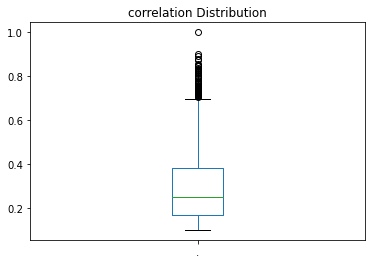

In [20]:
print(tuples_df.loc[tuples_df["correlation"]> 0].describe())

#analyzing the correlation numbers bigger than 1

tuples_df.loc[tuples_df["correlation"]> 0.1]["correlation"].plot(kind='box',title='correlation Distribution' ,label= '.')

<AxesSubplot:title={'center':'correlation Distribution'}>

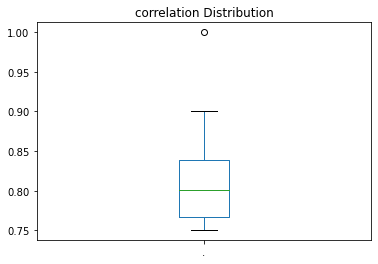

In [21]:
## with closer look into numbers around the 75% percentile   
tuples_df.loc[tuples_df["correlation"]> 0.75]["correlation"].plot(kind='box',title='correlation Distribution' ,label= '.')

- from here we can say that the outliers *above 0.85 correlation* are the ones who Can perform solid good prediction 

(this is exploratory analysis for further results cheak **Evalutation part** )

## Evaluation 
- for recommender evaluation, we used Covrage Test as our main test , (we need to spicify why ???)
 

In [42]:
##diagrm code                             ### Can be deleted ###

#df_pres_count = pd.DataFrame(data =Adopter_total_Accuracy, columns= ["Adopter_Accuracy"]).value_counts(normalize=True)
#count_distribution=df_pres_count.plot(kind='bar',title='Accuracy count distribution')

## caluating Coverage (i think this is a better metric to use in comparsion )
Steps 
- make a random sample of Adopter Dataset
- get 10 recommendation for each Adopter from this list (excluding the cat with the same ID as user)
- make a list of reommended Cats IDs 
- count unique catID
- coverage = num_unique_catIDs / number of recommendations (10*num_users)


 do this in three cycles and calcate the mean Coverage

In [30]:
# setting a test Datset of Adopter
df_adopters_Test_cover=df_adopters.sample(frac=0.1, replace=True, random_state=100).drop_duplicates()

### using correlation_matrix 

In [31]:
### recommender for evalutating coverage ###
## input : Adopter ID      ## output : ist of reommended Cats IDs


def recommend_cat_eval(name):
    name=int (name) ## reomve the int, case your input is string 
    Adopter_names = df_pivot.columns
    Adopter_list = list(Adopter_names)
    Cat_names = df_happy["cat_name"].tolist()
 
    try:
        if name in Adopter_list:
            Adopter_index = Adopter_list.index(name) 
            corr_Adopter = corr_mat[Adopter_index]
            tuples = list(zip(Adopter_names,corr_Adopter,Cat_names))
            tuples_df = pd.DataFrame(data =tuples, columns= ["ID_matching","correlation","cat_name"])
            #print("the nearest 10 cats to ",Adopter_index ," are")
            df_eval=tuples_df.sort_values(by = "correlation", ascending = False).iloc[1:11]
            #df_eval['Relevant_recommendation'] =df_eval.groupby(['ID_matching'])["correlation"].apply(lambda x: (x > 0.9).sum())
            #acc = df_eval['Relevant_recommendation'].sum()/len(df_eval)*100
            #print ("accurency value for user",user_input,"is" ,acc )
            return df_eval['ID_matching'].unique()
        

    except:
        print("Error in id input")
        recommend_cat_eval(name) 

In [43]:
# testing ##
#recommend_cat_eval(20)

In [55]:
## this def makes a sample Dataframe from the Dataset then calcultes the coverage ##

## input : random state of the sample Dataframe , the % of the Dataframe sample 
## dependancey : recommend_cat_eval, Adopters Dataset 

def coverage(random_state,frac):
    df_adopters_Test=df_adopters.sample(frac=frac, replace=True, random_state=random_state).drop_duplicates()
    Sample_num = len(df_adopters_Test.index)
    recomnneded_catIDs =[]
    for n in df_adopters_Test.index :
        recommend_cat_eval(n)
        recomnneded_catIDs.extend(recommend_cat_eval(n))

    recomnneded_catIDs
    unique_cat_recommended = len(set(recomnneded_catIDs))
    no_of_recommendations = 10*Sample_num
    coverage= (unique_cat_recommended/no_of_recommendations)*100
    print ("coverage (correlation_Matrix)" ,coverage )
    return coverage

In [118]:
## testing 
#coverage(100,0.1)

### using cosine simlarity 

In [102]:
def recommend_cat_cosine_eval(name):
    name=int (name) ## reomve the int, case your input is string 
    Adopter_names = df_pivot.columns
    Adopter_list1 = list(Adopter_names)
    Cat_names = df_happy["cat_name"].tolist()
 
    try:
        if name in Adopter_list:
            Adopter_index = Adopter_list.index(name) 
            cos_Adopter = cos_sim_mat[Adopter_index] 
            tuples2 = list(zip(Adopter_names,cos_Adopter,Cat_names))
            tuples_df2 = pd.DataFrame(data =tuples2, columns= ["ID_matching","correlation","cat_name"])
            #print("the nearest 10 cats to ",Adopter_index ," are")
            eval_cos_df =tuples_df2.sort_values(by = "correlation", ascending = False).iloc[1:11]
            return  eval_cos_df['ID_matching'].unique()
        
    except:
        print("Error in id input")
        recommend_cat(df_pivot,corr_mat)  

In [103]:
### debugging ##   ### can be deleted###

Sample_num = 5
recomnneded_catIDs =[]
for n in [0,1,2,3,4] :
        recommend_cat_cosine_eval(n)
        recomnneded_catIDs.extend(recommend_cat_cosine_eval(n))
print(recomnneded_catIDs)
print(len(recomnneded_catIDs))
unique_cat_recommended = len(set(recomnneded_catIDs))
unique_cat_recommended 
#no_of_recommendations = 10*Sample_num
#coverage= (unique_cat_recommended/no_of_recommendations)*100
#print ("coverage(cosine similarity) is" ,coverage )

[2019, 2251, 2186, 219, 454, 2491, 2512, 1695, 1532, 409, 231, 763, 1658, 2824, 946, 1974, 2526, 1702, 2109, 2358, 2701, 1952, 2798, 2792, 2756, 1400, 829, 2152, 2423, 2288, 527, 1160, 331, 1443, 1619, 329, 1506, 138, 1629, 426, 2584, 1930, 1840, 2045, 960, 342, 1715, 224, 2368, 592]
50


50

In [109]:
def coverage_Cosine(random_state,frac):
    df_adopters_Test=df_adopters.sample(frac=frac, replace=True, random_state=random_state).drop_duplicates()
    Sample_num = len(df_adopters_Test.index)
    recomnneded_catIDs =[]
    for n in df_adopters_Test.index :
        recommend_cat_cosine_eval(n)
        recomnneded_catIDs.extend(recommend_cat_cosine_eval(n))

    recomnneded_catIDs
    unique_cat_recommended = len(set(recomnneded_catIDs))
    no_of_recommendations = 10*Sample_num
    coverage= (unique_cat_recommended/no_of_recommendations)*100
    print ("coverage(cosine similarity) is" ,coverage )
    return coverage

### comparing the results 

In [52]:
coverage(100,0.1)
coverage(12,0.1)
coverage(50,0.1)

coverage is 58.8421052631579
coverage is 58.08510638297872
coverage is 59.049295774647895


59.049295774647895

##### using correlation matrix the mean coverage for recommender 1 is roughly 58.2% on a sample of 10% of our Dataset 

In [116]:
coverage_Cosine(100,0.1)
coverage_Cosine(12,0.1)
coverage_Cosine(50,0.1)

coverage(cosine similarity) is 56.24561403508772
coverage(cosine similarity) is 56.02836879432624
coverage(cosine similarity) is 56.30281690140845


56.30281690140845

##### using cosine similrity the mean coverage for recommender 1 is roughly 56 % on a sample of 10% of our Dataset 

In [114]:
### Testing coverage results at different samples of the Dataset 

cover_testing_sample= np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
cover_corr_mat=[]
cover_cos_sim=[]
for n in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
    coverage(100,n)
    cover_corr_mat.append(coverage(100,n))
    coverage_Cosine(100,n)
    cover_cos_sim.append(coverage_Cosine(100,n))
    

covrage_comparing= list(zip(cover_testing_sample,cover_corr_mat,cover_cos_sim))
covrage_comparing_df = pd.DataFrame(data =covrage_comparing, columns= ["DataSet_sample","corr_mat","cos_sim"])
covrage_comparing_df

coverage (correlation_Matrix) 58.8421052631579
coverage (correlation_Matrix) 58.8421052631579
coverage(cosine similarity) is 56.24561403508772
coverage(cosine similarity) is 56.24561403508772
coverage (correlation_Matrix) 41.268656716417915
coverage (correlation_Matrix) 41.268656716417915
coverage(cosine similarity) is 39.626865671641795
coverage(cosine similarity) is 39.626865671641795
coverage (correlation_Matrix) 32.44708994708995
coverage (correlation_Matrix) 32.44708994708995
coverage(cosine similarity) is 30.992063492063494
coverage(cosine similarity) is 30.992063492063494
coverage (correlation_Matrix) 27.300420168067223
coverage (correlation_Matrix) 27.300420168067223
coverage(cosine similarity) is 26.081932773109244
coverage(cosine similarity) is 26.081932773109244
coverage (correlation_Matrix) 23.60352422907489
coverage (correlation_Matrix) 23.60352422907489
coverage(cosine similarity) is 22.687224669603523
coverage(cosine similarity) is 22.687224669603523
coverage (correlatio

DataSet_sample   corr_mat    cos_sim
0             0.1  58.842105  56.245614
1             0.2  41.268657  39.626866
2             0.3  32.447090  30.992063
3             0.4  27.300420  26.081933
4             0.5  23.603524  22.687225
5             0.6  20.832061  20.137405
6             0.7  18.961749  18.394809
7             0.8  17.535960  17.029393
8             0.9  16.336806  15.844907
9             1.0  15.405111  14.986406

<AxesSubplot:xlabel='DataSet_sample'>

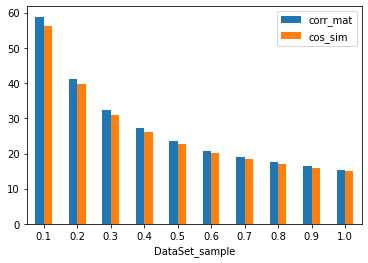

In [115]:
covrage_comparing_df.set_index("DataSet_sample").plot.bar(rot=0)

- the coverage decrease with bigger data set 
- there is a little advantage for the correlation_matrix methoud, however this diffrence decrease with the Dataset size
- the mean coverage for recommender-1 is using "correlation matrix" is 15.4% on 100% of our Dataset while using "Cosine_similarity" gives 14.98 %  


### Calculating Accuracy (for correlation _matrix only )

- to evalute the preformance we thought of clastering the pridections (aka. changing the result into a binary system)as follows:
    - relevant recommendation = correlation above 0.85
    - not relevant recommendation = else 
    
what column needed:
- reommendation clastering  .. to change it into Binary Classifier problem 
 Note : due to Dataset limition, as every Adopter rated one and only one cat, we couldnt varify both the False postive and , False negative  (aka. i cant measure the Precision and recall

In [22]:
df_eval=tuples_df.sort_values(by = "correlation", ascending = False).iloc[1:11]
df_eval['Relevant_recommendation'] =df_eval.groupby(['ID_matching'])["correlation"].apply(lambda x: (x > 0.85).sum())#.replace({1: "good", 0: "bad"})
df_eval

ID_matching  correlation  cat_name  Relevant_recommendation
2740         2740     0.900869      Jose                        1
1188         1188     0.890847   Kenneth                        1
292           292     0.876580  Victoria                        1
1224         1224     0.874159     Janet                        1
847           847     0.855683  Terrence                        1
860           860     0.850737      Mark                        1
656           656     0.848487    Elaine                        0
853           853     0.846810   Charles                        0
1941         1941     0.835498  Patricia                        0
1725         1725     0.831266     Mario                        0

In [23]:
Accuracy  = df_eval['Relevant_recommendation'].sum()/len(df_eval)*100
print ("Accuracy value for user",user_input,"is" ,Accuracy  )
#possible_relevant_items = df_eval['Relevant_recommendation'].value_counts()[0]
#df_eval['Relevant_recommendation'].sum()/len(df_eval)

Accuracy value for user 17 is 60.0


In [24]:
## input : user ID , ## the def takes user ID and gives 

def recommender_single_user_Accuracy  (name):
    name=int (name) ## reomve the int, case your input is string 
    Adopter_names = df_pivot.columns
    Adopter_list = list(Adopter_names)
    Cat_names = df_happy["cat_name"].tolist()
 
    try:
        if name in Adopter_list:
            Adopter_index = Adopter_list.index(name) 
            corr_Adopter = corr_mat[Adopter_index]
            tuples = list(zip(Adopter_names,corr_Adopter,Cat_names))
            tuples_df = pd.DataFrame(data =tuples, columns= ["ID_matching","correlation","cat_name"])
            df_eval=tuples_df.sort_values(by = "correlation", ascending = False).iloc[1:11]
            df_eval['Relevant_recommendation'] =df_eval.groupby(['ID_matching'])["correlation"].apply(lambda x: (x > 0.85).sum())
            Accuracy = df_eval['Relevant_recommendation'].sum()/len(df_eval)*100
            #print ("Accuracy  values for user",name,"is" ,Accuracy ) ## for loop cheak
            return Accuracy 
        

    except:
        print("Error in id input")
        recommend_cat_eval(name) 


In [25]:
recommender_single_user_Accuracy (17)

60.0

In [ ]:
## testing in samll loob ##        ### Can be Deleted ###

Adopter_total_Accuracy =[]
for n in [0,1,2,3,4,5]:
    recommender_single_user_Accuracy (n)
    Adopter_total_Accuracy .append(recommender_single_user_Accuracy (n))

print(Adopter_total_Accuracy)
average_Accuracy = sum(Adopter_total_Accuracy )/len (Adopter_total_Accuracy ) 
average_Accuracy 

In [40]:
## this def makes a sample Dataframe from the Dataset then calcultes the presision  ##

## input : random state of the sample Dataframe , the % of the Dataframe sample  

def Accuracy  (random_state,frac):
    df_adopters_Test=df_adopters.sample(frac=frac, replace=True, random_state=random_state).drop_duplicates()
    Sample_num = len(df_adopters_Test.index)
    Adopter_total_Accuracy =[]
    for n in df_adopters_Test.index :
        recommender_single_user_Accuracy(n)
        Adopter_total_Accuracy.append(recommender_single_user_Accuracy (n))
    Adopter_total_Accuracy
    df_pres_count = pd.DataFrame(data =Adopter_total_Accuracy, columns= ["Adopter_Accuracy"]).value_counts(normalize=True)
    count_distribution=df_pres_count.plot(kind='bar',title='Accuracy count distribution')
    average_Accuracy = sum(Adopter_total_Accuracy )/len (Adopter_total_Accuracy )
    print (count_distribution)

    print ("average_Accuracy is")
    return average_Accuracy 

AxesSubplot(0.125,0.125;0.775x0.755)
average_Accuracy is


66.1038148843027

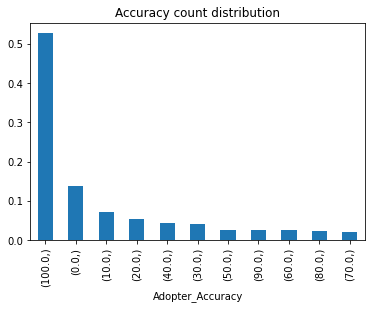

In [41]:
Accuracy (100,0.8)

## recommender 1_using correlation matrix (input value) 

In [74]:
 def recommend_cat(df_pivot, corr_mat):
    name=int (input("Enter the Adopter name you want to match: ")) ## reomve the int, case your input is string 
    Adopter_names = df_pivot.columns
    Adopter_list = list(Adopter_names)
    Cat_names = df_happy["cat_name"].tolist()
 
    try:
        if name in Adopter_list:
            Adopter_index = Adopter_list.index(name) 
            corr_Adopter = corr_mat[Adopter_index]
            tuples = list(zip(Adopter_names,corr_Adopter,Cat_names))
            tuples_df = pd.DataFrame(data =tuples, columns= ["ID_matching","correlation","cat_name"])
            print("the nearest 10 cats to ",Adopter_index ," are")
            print(tuples_df.sort_values(by = "correlation", ascending = False).iloc[1:11])
        

        else:
            name=" "+name
            Adopter_index = Adopter_list.index(name) 
            corr_Adopter = corr_mat[Adopter_index]
            tuples = list(zip(Adopter_names,corr_Adopter,Cat_names))
            tuples_df = pd.DataFrame(data =tuples, columns= ["ID_matching","correlation","cat_name"])
            print("the nearest 10 adopters  to ",Adopter_index ," are")
            print(tuples_df.sort_values(by = "correlation", ascending = False).iloc[1:11])
    except:
        print("Enter the Adopter Name Again")
        recommend_cat(df_pivot,corr_mat)    

## recommender 1_using cosine similarity (input value) 

In [75]:
def recommend_cat_cosine(df_pivot):
    name=int (input("Enter the Adopter name you want to match: ")) ## reomve the int, case your input is string 
    Adopter_names = df_pivot.columns
    Adopter_list1 = list(Adopter_names)
    Cat_names = df_happy["cat_name"].tolist()
 
    try:
        if name in Adopter_list:
            Adopter_index = Adopter_list.index(name) 
            cos_Adopter = cos_sim_mat[Adopter_index] 
            tuples2 = list(zip(Adopter_names,cos_Adopter,Cat_names))
            tuples_df2 = pd.DataFrame(data =tuples2, columns= ["ID_matching","correlation","cat_name"])
            print("the nearest 10 cats to ",Adopter_index ," are")
            print(tuples_df2.sort_values(by = "correlation", ascending = False).iloc[1:11])
        
    except:
        print("Enter the Adopter Name Again")
        recommend_cat(df_pivot,corr_mat)    

In [80]:
recommend_cat(df_pivot, corr_mat)

Enter the Adopter name you want to match: 1
the nearest 10 cats to  1  are
      ID_matching  correlation cat_name
231           231     0.924178   Daniel
763           763     0.909912     Noel
1658         1658     0.906302     Mark
874           874     0.902332   Willie
2824         2824     0.901213  Phyllis
946           946     0.900186  Lillian
514           514     0.893698     Alan
1702         1702     0.893398  Jessica
1974         1974     0.892424     Lisa
2074         2074     0.891720    James


In [108]:
recommend_cat_cosine(df_pivot)

Enter the Adopter name you want to match: 0
the nearest 10 cats to  0  are
      ID_matching  correlation  cat_name
2019         2019     0.988974     Casey
2251         2251     0.986132     Kevin
2186         2186     0.985852    Laurie
219           219     0.984913    Daniel
454           454     0.982925     Homer
2491         2491     0.982648     Steve
2512         2512     0.981770     Jamar
1695         1695     0.981427      Rose
1532         1532     0.980596   Gregory
409           409     0.980505  Roderick


## Recommender 2 

### find  nearset Cat using (correlation matrix of cat to simulate the separtion of Cat /Owner Data)
- to match the separtion between cats and adopter Dataset 
- to test the diffrence we splitted the Cat Dataset, producing a subset of the original Data (20% of the data)
- to avoid confusion the cat ID are coded with "C" symbol for the online version  

In [ ]:
## note: making Cat ids to avoid confusion 


df_cats = df_happy.loc[:, "cat_age":"fearful"] 

df_cats_online=df_cats.sample(frac=0.2, replace=True, random_state=100).drop_duplicates()

# to cheak for duplictes using .sample
#print(len(df_cats["ID-cat"].unique()))
#print(len(df_cats_online["ID-cat"].unique()))
#len(df_cats_online["ID-cat"])

In [ ]:
df_cats_online["ID-cat"] =  "C-" + df_cats_online.index.astype(str)
df_cats_online = df_cats_online.set_index("ID-cat")

In [ ]:
df_cats_online

In [ ]:
cat_Ids = df_cats_online.index

### testing with user input 

In [ ]:
##adopter things 
Adopter_names = df_pivot.columns
Adopter_list = list(Adopter_names)
Adopter_index = Adopter_list.index(20)
Cat_names = df_happy["cat_name"].tolist()

#applying the logic 
corr_Adopter = corr_mat[Adopter_index]


#best Adopter
best_adopter = list(zip(Adopter_names,corr_Adopter))
df_adopterDset = pd.DataFrame(data =best_adopter, columns= ["ID_Adopter","correlation_Adopter"])
print("the nearest adopter to ",Adopter_index ," is")
print(df_adopterDset.sort_values(by = "correlation_Adopter", ascending = False).iloc[1:2])

# extracting best data from the offline Dataset
best_cat_index = df_adopterDset.sort_values(by = "correlation_Adopter", ascending = False).iloc[1:2].index


best_cat =df_happy.loc[best_cat_index[0], "cat_age":"fearful"] ## extracting the conncected cat part 
best_cat 


In [ ]:
#adding our imaginary best cat to the online cat_dataset

df_cats_online_new =df_cats_online.append(best_cat , sort=False) ## in case idex dont match 

df_pivot_cat=df_cats_online_new.transpose()
df_pivot_cat

##to cheak no. of people who didnt fill at least half of the questionnare 
#df_pivot_cat[df_pivot==0].apply(lambda x: x.count()>5).value_counts()

In [ ]:

df_matrix= df_pivot_cat.corr(method='pearson')
cat_match =df_matrix[best_cat_index[0]].values

## numpy correrlation didnt work properly 
#x_cat=df_pivot_cat.values.T  
#corr_mat_cat = np.corrcoef(x_cat)
#cat_match= corr_mat_cat[best_cat_index[0]]

In [ ]:
#presenting results

matching_cat = list(zip(Adopter_names,cat_match,Cat_names,cat_Ids))

matching_cat_df = pd.DataFrame(data =matching_cat, columns= ["ID_origial","correlation_cat","cat_name","ID_Cats_online"])
print("the nearest 10 cats to ",Adopter_index ," are")
matching_cat_df.sort_values(by = "correlation_cat", ascending = False).iloc[0:11]

## def (recommender Version 2.1)
- Advantages there is a complete separtion between the Adopter and Cats 


In [ ]:
def recommend_cat_2(df_pivot, corr_mat, df_cats_online):
    name=int (input("Enter the Adopter name you want to match: ")) ## reomve the int, case your input is string 
    Adopter_names = df_pivot.columns
    Adopter_list = list(Adopter_names)
    Cat_names = df_happy["cat_name"].tolist()
    cat_Ids = df_cats_online.index
 
    try:
        if name in Adopter_list:
            Adopter_index = Adopter_list.index(name) 
            corr_Adopter = corr_mat[Adopter_index] ## finding the best user (maybe Knn can be good)
            #best Adopter
            best_adopter = list(zip(Adopter_names,corr_Adopter))
            df_adopterDset = pd.DataFrame(data =best_adopter, columns= ["ID_Adopter","correlation_Adopter"])
            print("the nearest adopter to ",Adopter_index ," is")
            print(df_adopterDset.sort_values(by = "correlation_Adopter", ascending = False).iloc[1:2])

            # extracting nearset adopters cat data from the offline Dataset
            best_cat_index = df_adopterDset.sort_values(by = "correlation_Adopter", ascending = False).iloc[1:2].index
            best_cat =df_happy.loc[best_cat_index[0], "cat_age":"fearful"] 
            #adding data to the online cat Dataset
            df_cats_online_new =df_cats_online.append(best_cat , sort=False) 

            ## making the new matrix (takes long time)
            df_pivot_cat=df_cats_online_new.transpose()
            df_matrix= df_pivot_cat.corr(method='pearson')
            cat_match =df_matrix[best_cat_index[0]].values

            #presenting results

            matching_cat = list(zip(Adopter_names,cat_match,Cat_names,cat_Ids))

            matching_cat_df = pd.DataFrame(data =matching_cat, columns= ["ID_online","correlation_cat","cat_name","origianl_ID"])
            print("the nearest 10 cats to ",Adopter_index ," are")
            print(matching_cat_df.sort_values(by = "correlation_cat", ascending = False).iloc[0:11])
            
        
    except:
        print("Enter the Adopter Name Again")
        recommend_cat(df_pivot,corr_mat) 




### comparing the results 

In [ ]:
recommend_cat_2(df_pivot, corr_mat, df_cats_online)

In [ ]:
recommend_cat(df_pivot, corr_mat)

# def (recommender Version 2 ) (old version)

### 

In [ ]:
 def recommend_cat_2_old(df_pivot, corr_mat,df_pivot_cat,corr_mat_cat):
    name=int (input("Enter the Adopter name you want to match: ")) ## reomve the int, case your input is string 
    Adopter_names = df_pivot.columns
    Adopter_list = list(Adopter_names)
    Cat_names = df_happy["cat_name"].tolist()
 
    try:
        if name in Adopter_list:
            Adopter_index = Adopter_list.index(name) 
            corr_Adopter = corr_mat[Adopter_index] ## finding the best user (maybe Knn canbe good)
            best_adopter = list(zip(Adopter_names,corr_Adopter))
            df_adopterDset = pd.DataFrame(data =best_adopter, columns= ["ID_matching","correlation_Adopter"])
            print("the nearest adopter to ",Adopter_index ," is")
            print(df_adopterDset.sort_values(by = "correlation_Adopter", ascending = False).iloc[1:2])

            # matching his Cat with Cat Dataset
            best_cat = df_adopterDset.sort_values(by = "correlation_Adopter", ascending = False).iloc[1:2].index
            corr_Cats = corr_mat_cat [best_cat]

            #presenting results

            matching_cat = list(zip(Adopter_names,corr_Cat,Cat_names))
            matching_cat_df = pd.DataFrame(data =matching_cat, columns= ["ID_matching","correlation_cat","cat_name"])
            print("the nearest 10 cats to ",Adopter_index ," are")
            print(matching_cat_df.sort_values(by = "correlation_cat", ascending = False).iloc[1:11])

        
    except:
        print("Enter the Adopter Name Again")
        recommend_cat(df_pivot,corr_mat) 

In [ ]:
recommend_cat_2_old(df_pivot, corr_mat,df_pivot_cat,corr_mat_cat )
